In [2]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [3]:
Train_DIR = 'images/train'
Test_DIR = 'images/test'

In [4]:
def createDataFrame(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imageName in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, imageName))
            labels.append(label)
        print (label, 'completed')
    return image_paths, labels

In [5]:
train = pd.DataFrame()
train['image'], train['label'] = createDataFrame(Train_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [6]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = createDataFrame(Test_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(test)

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [9]:
from tqdm.notebook import tqdm

In [10]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale = True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [11]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\Huzaifa Mumtaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [12]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [13]:
x_train = train_features/255.0
x_test = test_features/255.0

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [16]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [17]:
y_train = to_categorical(y_train, num_classes = 7)
y_test = to_categorical(y_test, num_classes = 7)

In [18]:
model = Sequential()
# convolutional Layers
model.add (Conv2D(128, kernel_size= (3,3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add (Dropout(0.4))

model.add(Conv2D (256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add (Dropout (0.4))

model.add (Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add (Dropout(0.4))

model.add(Conv2D (512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add (Dropout(0.4))

model.add (Flatten())
#fully connected Layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add (Dropout (0.3))
# output Layer
model.add (Dense(7, activation='softmax'))

In [19]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

In [20]:
model.fit(x=x_train, y=y_train, batch_size = 128, epochs = 100, validation_data = (x_test, y_test))

Epoch 1/100


136/226 [=================>............] - ETA: 3:38 - loss: 1.8268 - accuracy: 0.2451

KeyboardInterrupt: 

In [21]:
model_json = model.to_json()
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

C:\Users\Huzaifa Mumtaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
from keras.models import model_from_json

In [25]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [26]:
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [30]:
def ef(image):
    img = load_img(image, grayscale = True)
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature/255.0

In [43]:
image = 'images/train/sad/42.jpg'
print("Original Image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

Original Image is of sad
1/1 [==============================] - 0s 44ms/step
model prediction is  happy


In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

Original Image is of sad
1/1 [==============================] - 0s 46ms/step
model prediction is  happy


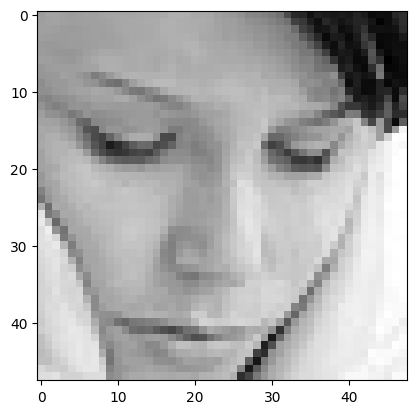

In [50]:
image = 'images/train/sad/42.jpg'
print("Original Image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48, 48), cmap = 'gray')